<a href="https://colab.research.google.com/github/whyb2nrml/KNOU/blob/main/%EC%A7%80%EB%8A%A5%ED%98%95%EC%A0%95%EB%B3%B4%EC%B2%98%EB%A6%AC%EC%8B%9C%EC%8A%A4%ED%85%9C_2%EA%B0%95_%ED%8C%A8%ED%84%B4%EC%9D%B8%EC%8B%9D%EA%B8%B0_%EA%B0%9C%EB%B0%9C_%EC%A0%90%EA%B2%80%ED%95%98%EA%B8%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Q1. 매트랩을 이용하여 다음 단계를 따라 간단한 분류 실험을 해 보시오.
    아래에 정의된 평균과 공분산을 가진 가우시안 분포를 따르는 두 클래스에
    대하여 각각 25개의 학습 데이터와 25개의 테스트 데이터를 생성하여 
    2차원 평면상의 산점도가 어떻게 나오는지 설명하시오.

In [ ]:
import numpy as np
from scipy.linalg import sqrtm
import matplotlib.pyplot as plt

In [ ]:
n = 25
m1 = np.full((n, 2), [3,5])
m2 = np.full((n, 2), [5,3])

m1, m2

In [ ]:
s1 = np.full((2,2), [[1,1], [1,2]])
s2 = s1
s1

array([[1, 1],
       [1, 2]])

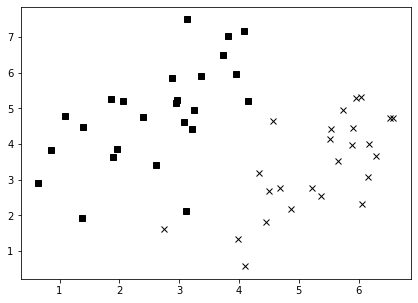

In [ ]:
np.random.seed(313)

X1 = np.random.normal(0, 1, size=(n,2))
X1 = np.dot(X1, sqrtm(s1)) + m1
X2 = np.random.normal(0, 1, size=(n,2))
X2 = np.dot(X2, sqrtm(s2)) + m2

plt.figure(figsize=(7,5))
plt.plot(X1[:, 0], X1[:, 1], 'ks', X2[:, 0], X2[:, 1], 'kx')
plt.show()

Q2. 학습 데이터를 이용하여 각 클래스의 평균과 공분산을 추정해 보고,
    (1)에서 정의한 실평균과 실공분산 값과 비교해 보시오.

In [ ]:
m1q2 = np.full((1,2), [X1[:, 0].mean(), X1[:, 1].mean()])
m2q2 = np.full((1,2), [X2[:, 0].mean(), X2[:, 1].mean()])
s1q2 = np.cov(X1[:, 0], X1[:, 1])
s2q2 = np.cov(X2[:, 0], X2[:, 1])

print(m1q2,m2q2,s1q2,s2q2, sep='\n\n')

[[2.63171898 4.86943545]]

[[5.31405678 3.38929376]]

[[1.06164529 0.90435198]
 [0.90435198 2.05758529]]

[[0.89246353 0.8566874 ]
 [0.8566874  1.70836337]]


In [ ]:
# Q3. (2)에서 계산한 평균을 이용하여 결정경계식을 찾아보고,
#     그래프를 설명해 보시오.    

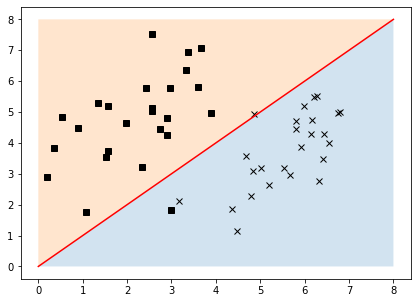

In [ ]:
np.random.seed(313)

X1q3 = np.random.normal(0, 1, size=(n,2))
X1q3 = np.dot(X1q3, sqrtm(s1q2)) + m1q2
X2q3 = np.random.normal(0, 1, size=(n,2))
X2q3 = np.dot(X2q3, sqrtm(s2q2)) + m2q2

plt.figure(figsize=(7,5))
plt.plot( X1q3[:, 0], X1q3[:, 1], 'ks'
        , X2q3[:, 0], X2q3[:, 1], 'kx'
        , [0,8], [0,8], 'red')
plt.fill_between([0, 8], [0, 8], alpha=0.2)
plt.fill_between([0, 8], 8, [0,8], alpha=0.2)
plt.show()

In [ ]:
# Q4. (3)에서 찾은 결정경계를 이용하여 학습 데이터와 테스트 데이터에 대해
#     분류를 수행하고, 분류오차를 계산해 보시오.

In [ ]:
err = 0
ttl = 50
n = X1q3.shape[0]
for i in range(n):
  d1 = np.linalg.norm(X1q3[i] - m1q2)
  d2 = np.linalg.norm(X1q3[i] - m2q2)
  if (d1-d2) > 0:
    err += 1
  else:
    pass
  d1 = np.linalg.norm(X2q3[i] - m1q2)
  d2 = np.linalg.norm(X2q3[i] - m2q2)
  if (d1-d2) < 0:
    err += 1
  else:
    pass

print(f'{err}/{ttl}')

1/50


In [ ]:
# Q5. 테스트 데이터와는 별도로 충분히 많은 양의 데이터를 생성하여
#     일반화오차의 근사값을 계산해 보시오.

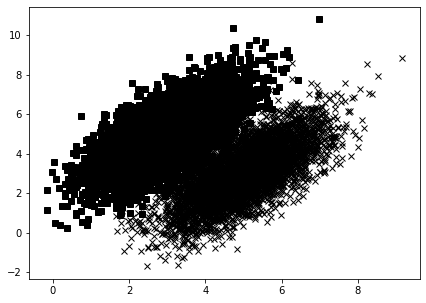

In [ ]:
n = 5000
m1 = np.full((n, 2), [3,5])
m2 = np.full((n, 2), [5,3])
s1 = np.full((2,2), [[1,1], [1,2]])
s2 = s1

np.random.seed(1740)

t1 = np.random.normal(0, 1, size=(n,2))
t1 = np.dot(t1, sqrtm(s1)) + m1
t2 = np.random.normal(0, 1, size=(n,2))
t2 = np.dot(t2, sqrtm(s2)) + m2

plt.figure(figsize=(7,5))
plt.plot(t1[:, 0], t1[:, 1], 'ks', t2[:, 0], t2[:, 1], 'kx')
plt.show()

In [ ]:
err = 0
ttl = 5000
n = t1.shape[0]
for i in range(n):
  d1 = np.linalg.norm(t1[i] - m1)
  d2 = np.linalg.norm(t1[i] - m2)
  if (d1-d2) > 0:
    err += 1
  else:
    pass
  d1 = np.linalg.norm(t2[i] - m1)
  d2 = np.linalg.norm(t2[i] - m2)
  if (d1-d2) < 0:
    err += 1
  else:
    pass

print("오류분류 개수: "f'{err}/{ttl}', "오류율: " + str(err/ttl*100) + '%', sep='\n')

오류분류 개수: 221/5000
오류율: 4.42%


In [ ]:
# 숫자 데이터의 분류

In [ ]:
import matplotlib.image as img
import os
import numpy as np

In [ ]:
path = os.getcwd()
path

'/content'

In [ ]:
i=0;j=3
fn = img.imread(os.path.join(path, f'digit{i}_{j}.bmp'))
fn = fn[:,:,0]
fn = fn.reshape(-1,1)
type(fn)

numpy.ndarray

In [ ]:
Xtrain = np.empty((320,0))
Ttrain = np.array([])
for i in range(10):
  for j in range(3, 8):
    # print(f'digit{i}_{j}')
    fn = img.imread(os.path.join(path, f'digit{i}_{j}.bmp'))
    fn = fn[:,:,0]
    fn = fn.reshape(-1,1)
    # i = np.array([0])
    Xtrain = np.append(Xtrain, fn, axis=1)
    Ttrain = np.append(Ttrain, np.array([i]))

In [ ]:
Xtest = np.empty((320,0))
Ttest = np.array([])
for i in range(10):
  for j in range(1, 3):
    # print(f'digit{i}_{j}')
    fn = img.imread(os.path.join(path, f'digit{i}_{j}.bmp'))
    fn = fn[:,:,0]
    fn = fn.reshape(-1,1)
    # i = np.array([0])
    Xtest = np.append(Xtest, fn, axis=1)
    Ttest = np.append(Ttest, np.array([i]))

In [ ]:
mX = np.empty((320,0))
for i in range(10):
  npm = np.mean(Xtrain[:, (5*i):(5*i+5)], axis=1)
  npm = npm.reshape(-1,1)
  mX = np.append(mX, npm, axis=1)

In [ ]:
mX = mX*255
mX = mX.astype('uint8')
mX.dtype

dtype('uint8')

In [ ]:
for i in range(mX.shape[1]):
  a = mX[:, i].reshape(20,16)
  # plt.subplot(1, 10, i+1)
  plt.imshow(a)
  plt.show()

In [ ]:
# x = Xtrain[:, 0]
# dist = np.array([])
dist = np.append(dist, np.linalg.norm(x - mX[:, 2]))

In [ ]:
dist.min()

3082.7560720887404

In [ ]:
for i in Xtrain.shape[1]:
  x = Xtrain[:, i]
  dist = []
  for j in range(10):
    dist.append(np.linalg.norm(x - mX[:, j]))
  